In [29]:
import seaborn as sns
import pandas as pd
import pandas.api.types as ptypes
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = False 

from sklearn.feature_selection import chi2 

from scipy.stats import chi2_contingency
import re

In [3]:
def LoadData():
    df = pd.read_csv("./../Data/training_v2.csv")
    return df

In [4]:
df = LoadData()

In [5]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [6]:
df["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [7]:
df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [8]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [9]:
for col in df.columns:
    if len(df[col].value_counts()) == 2 and 1 in df[col] \
       or col.find("_id") > -1:
        df[col] = df[col].astype("category")
        

In [10]:
numeric_cols = [col for col in df.columns if ptypes.is_numeric_dtype(df[col])]
print(numeric_cols)

['age', 'bmi', 'height', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noni

In [11]:
dfnums = df[numeric_cols]
cor = dfnums.corr()

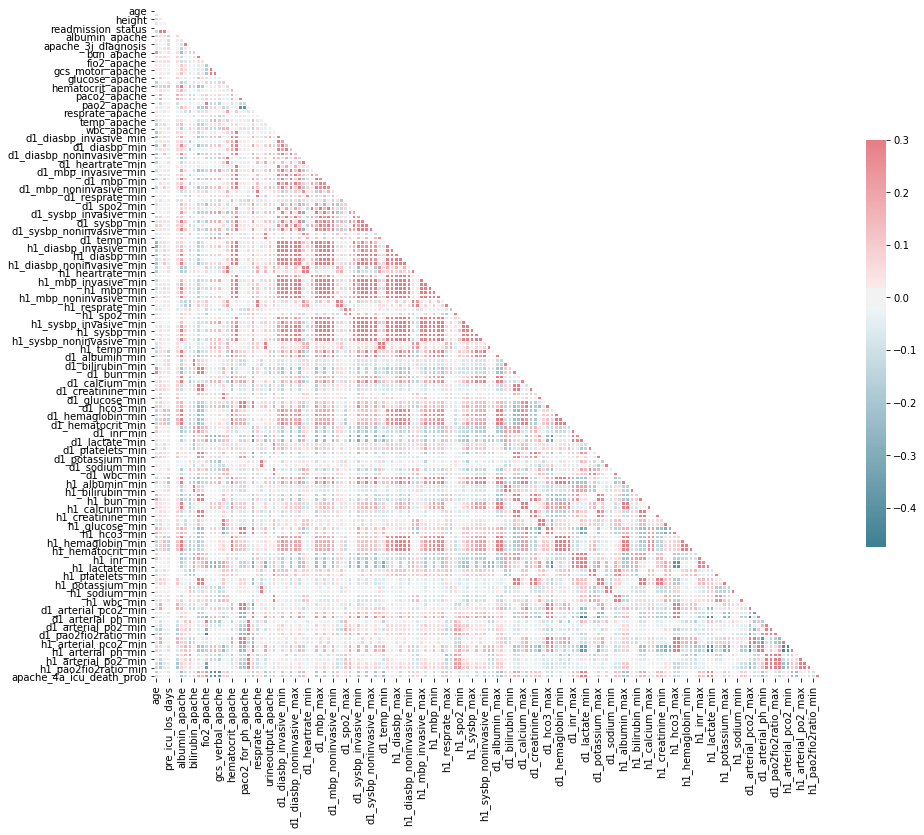

In [12]:

mask = np.triu(np.ones_like(cor, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

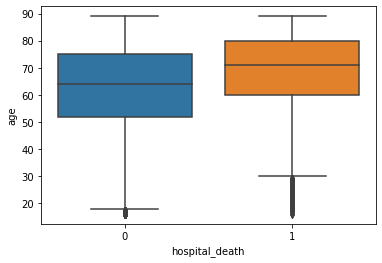

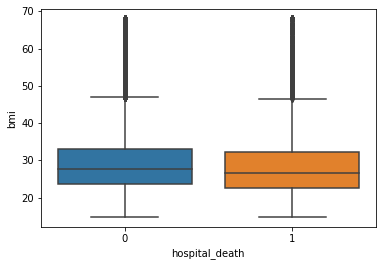

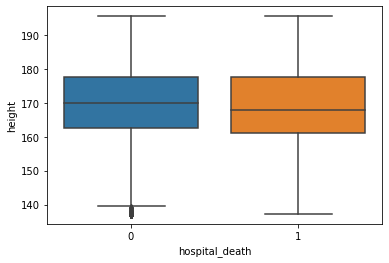

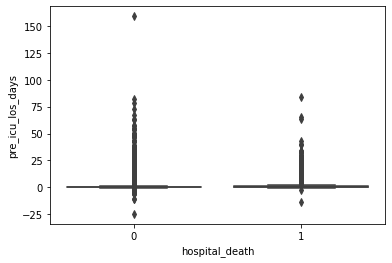

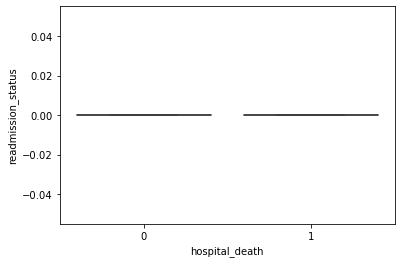

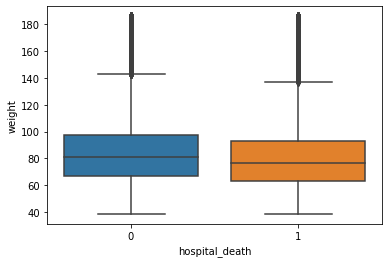

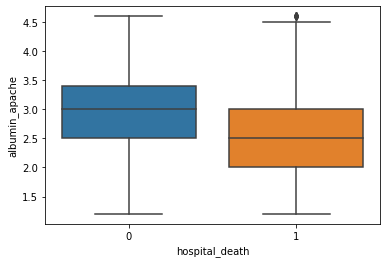

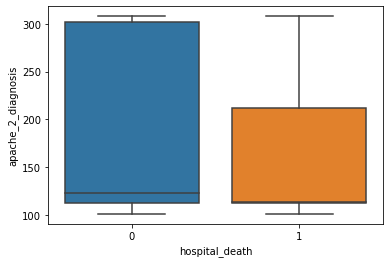

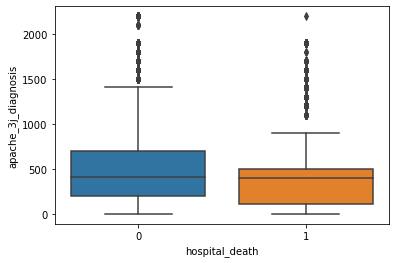

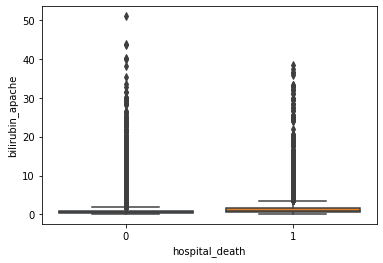

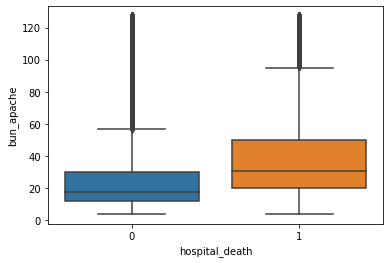

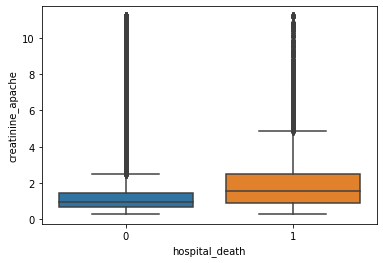

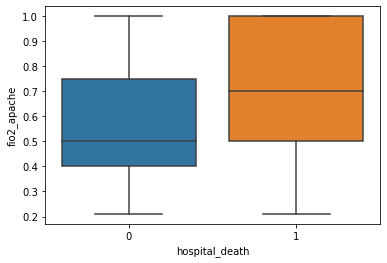

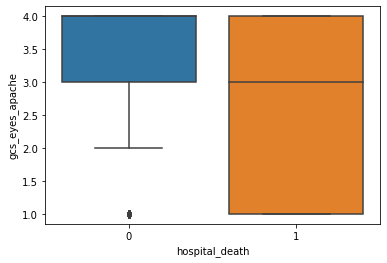

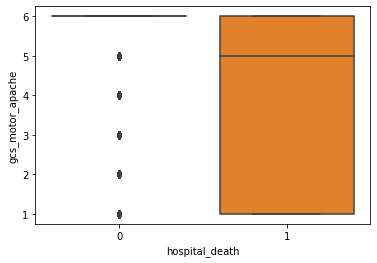

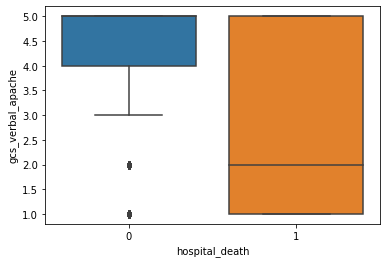

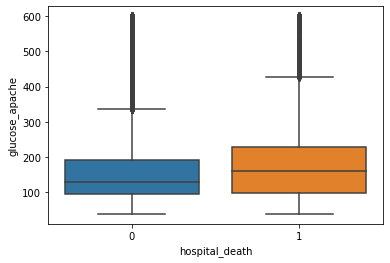

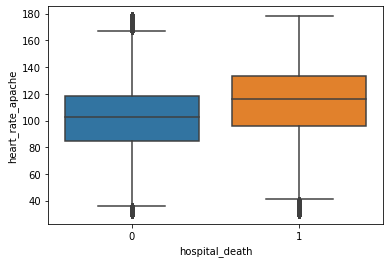

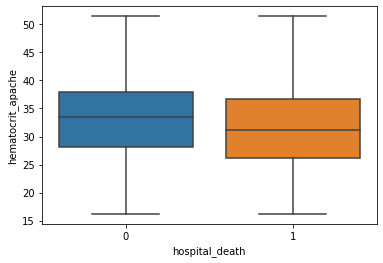

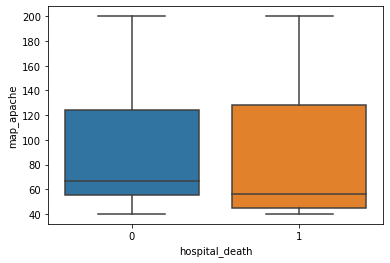

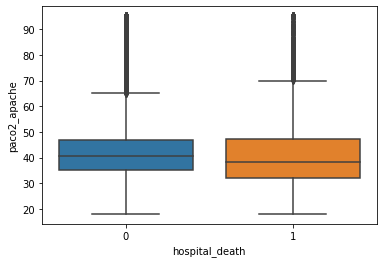

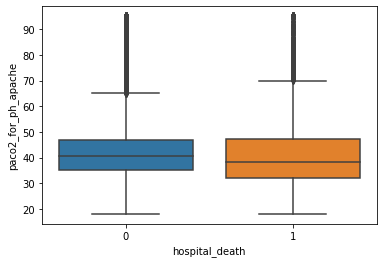

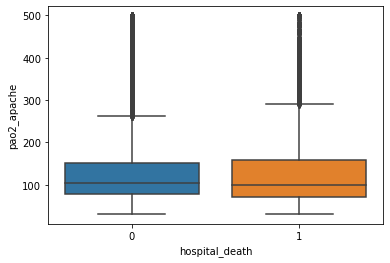

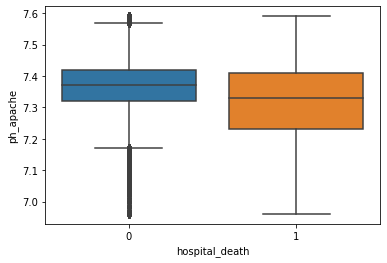

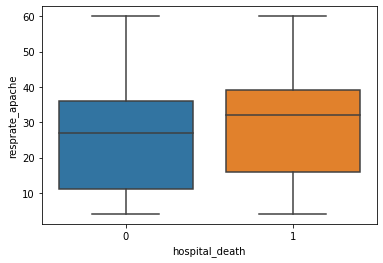

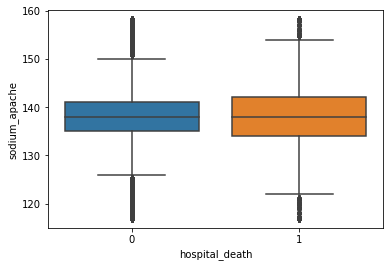

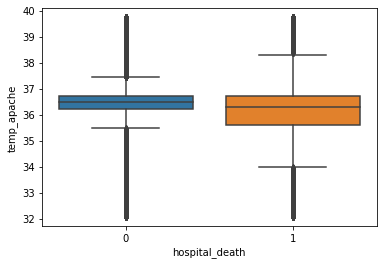

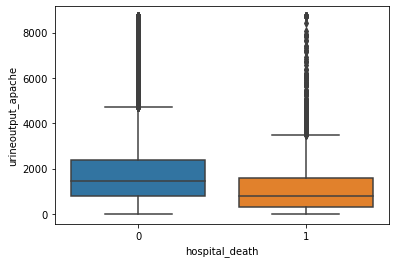

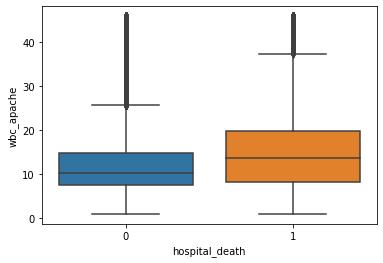

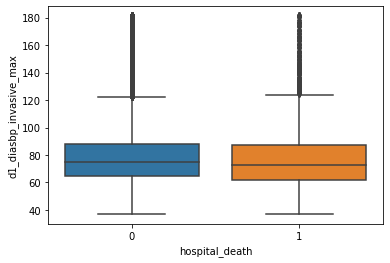

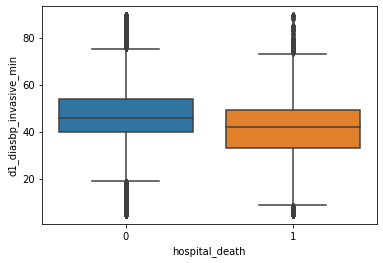

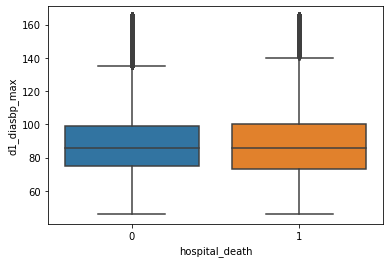

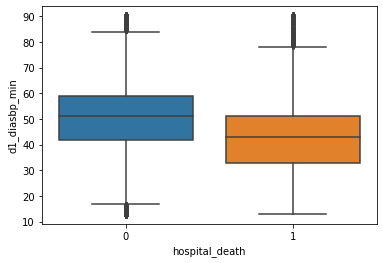

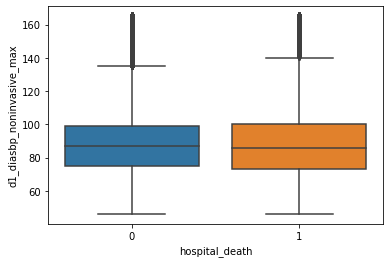

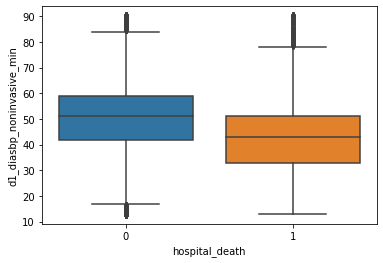

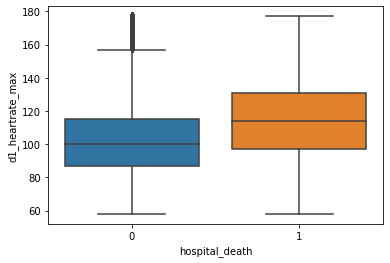

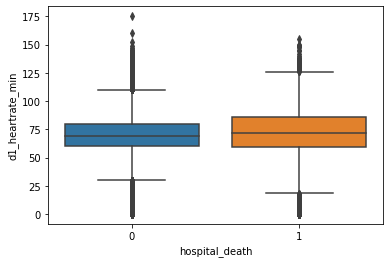

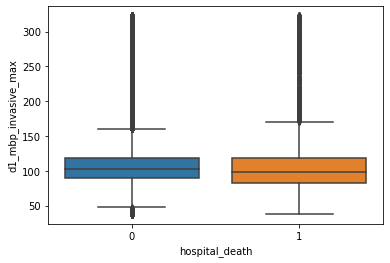

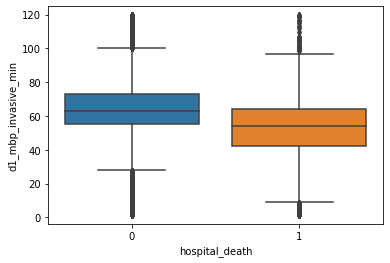

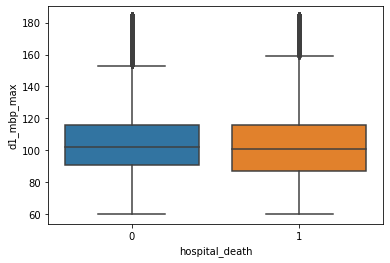

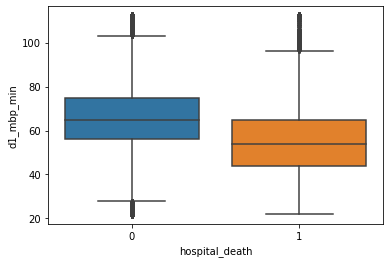

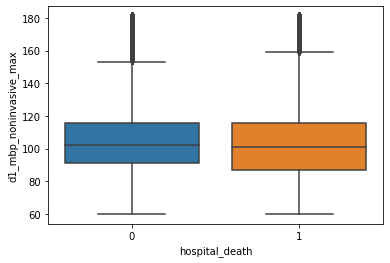

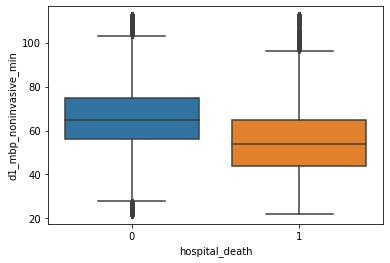

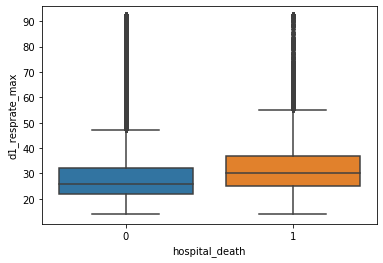

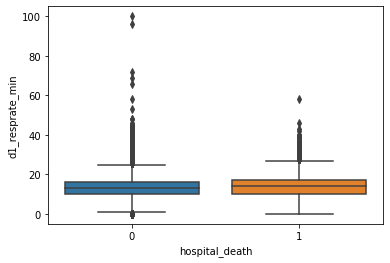

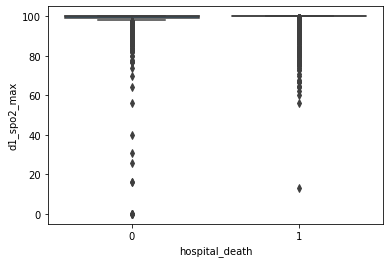

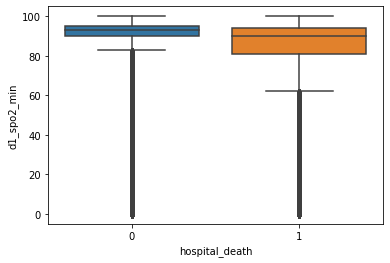

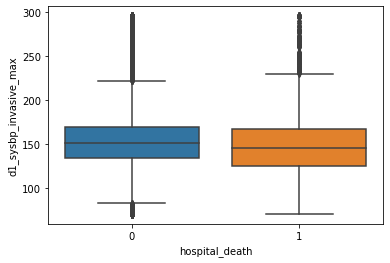

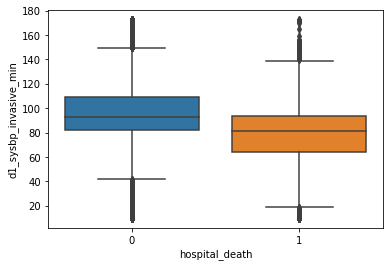

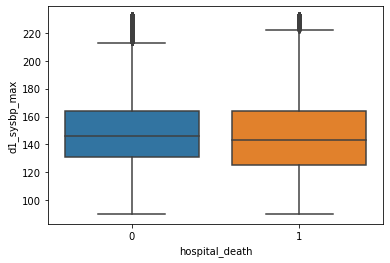

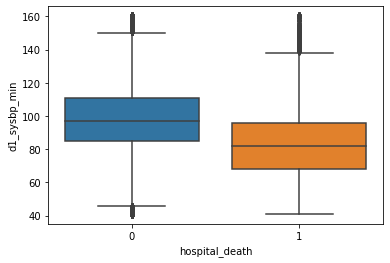

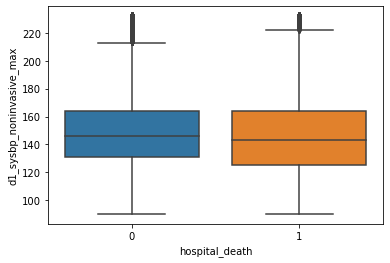

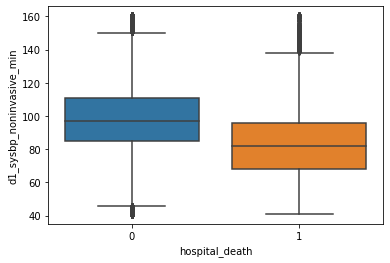

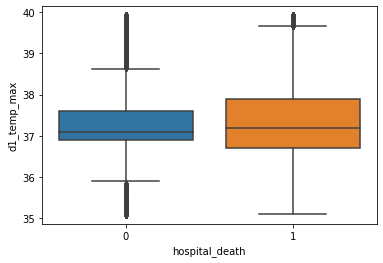

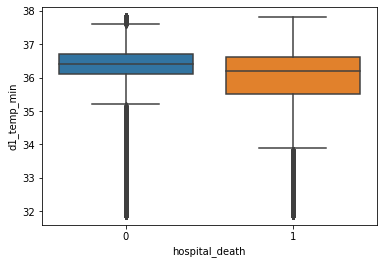

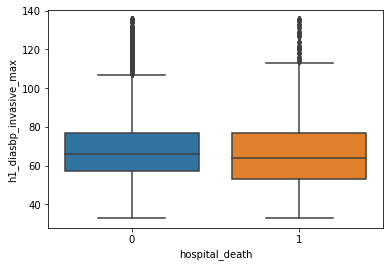

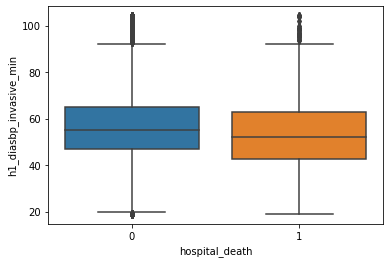

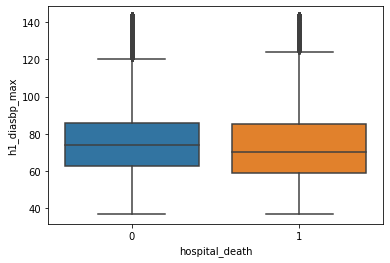

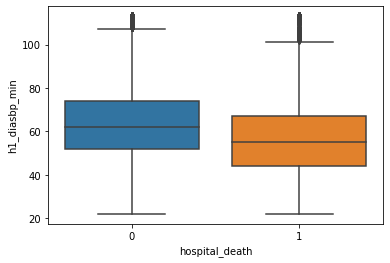

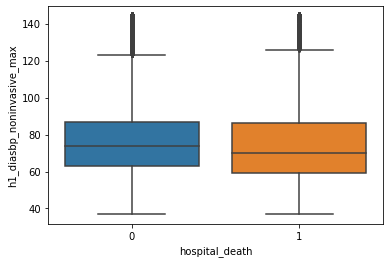

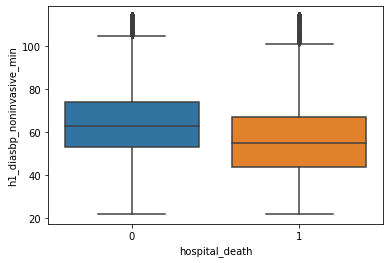

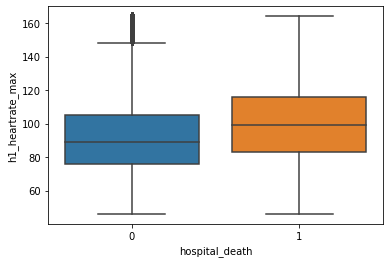

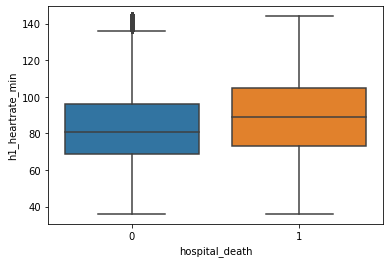

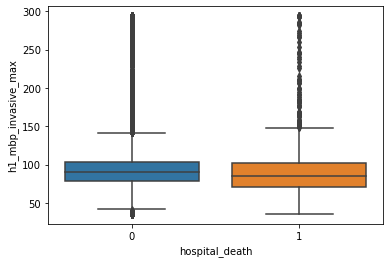

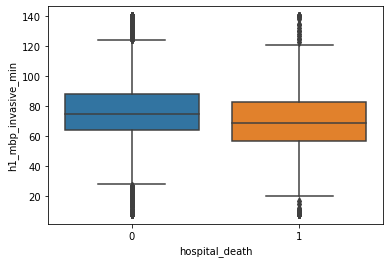

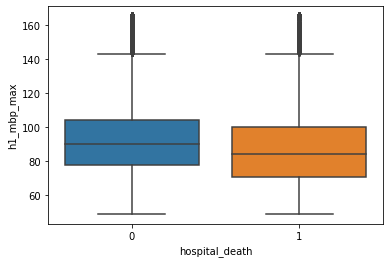

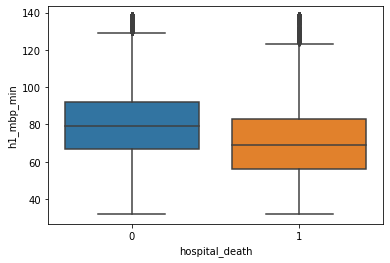

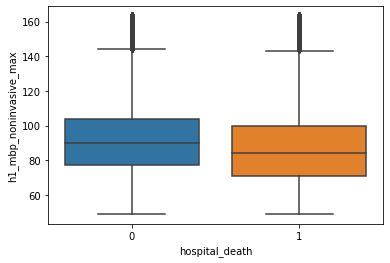

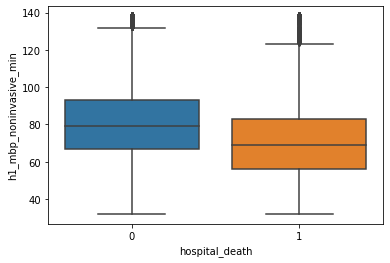

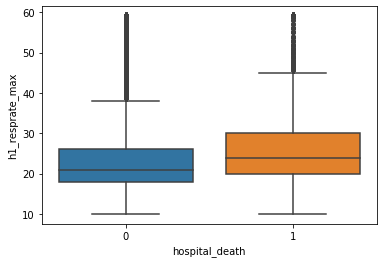

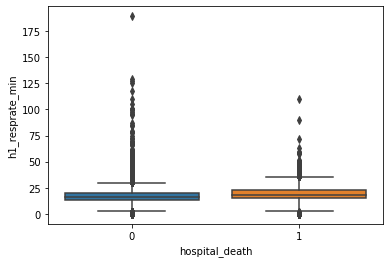

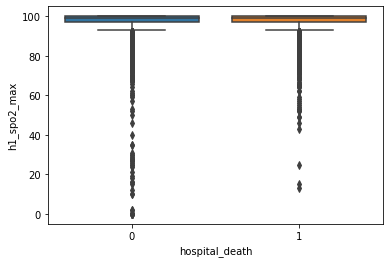

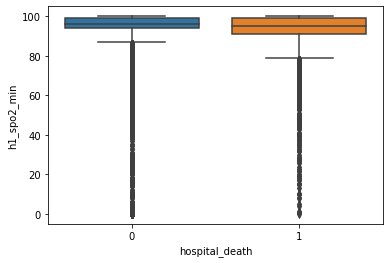

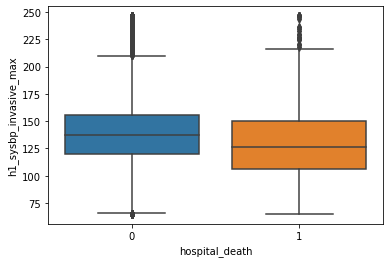

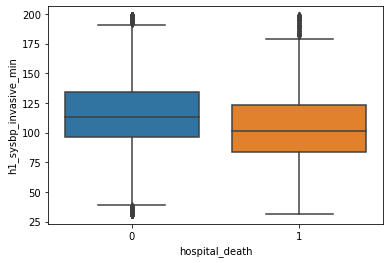

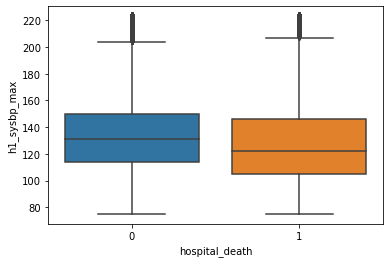

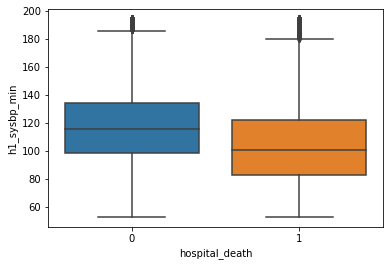

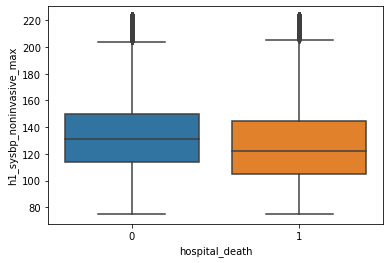

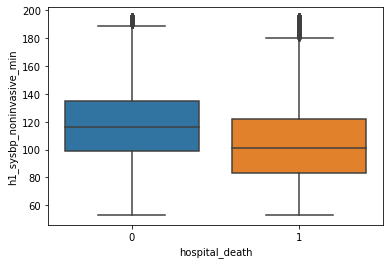

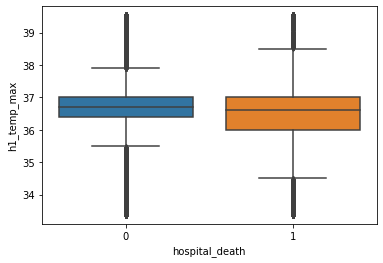

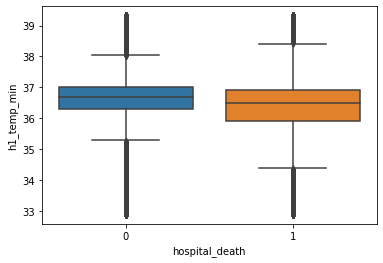

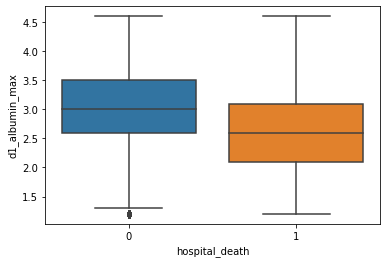

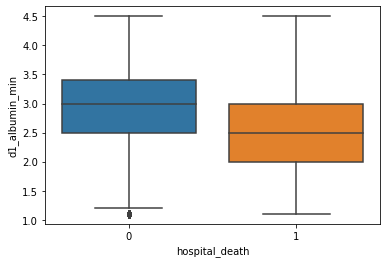

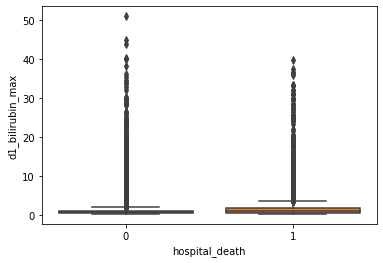

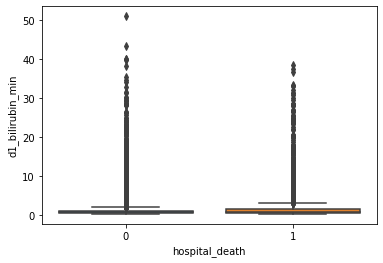

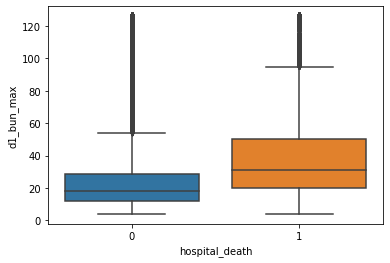

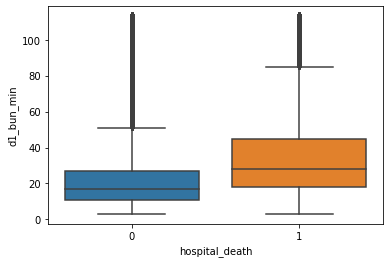

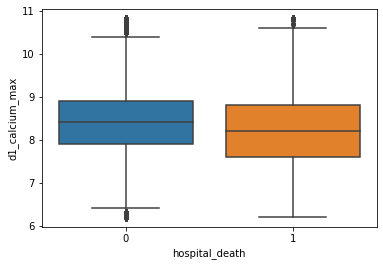

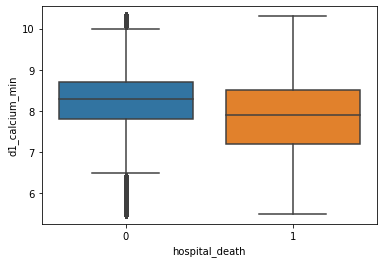

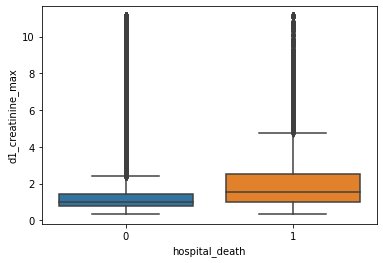

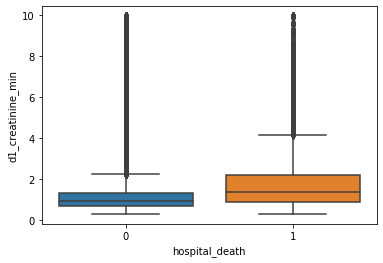

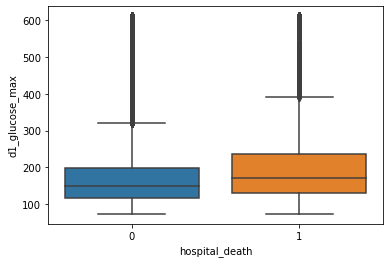

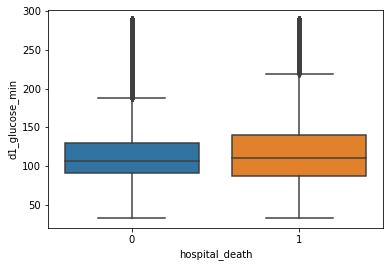

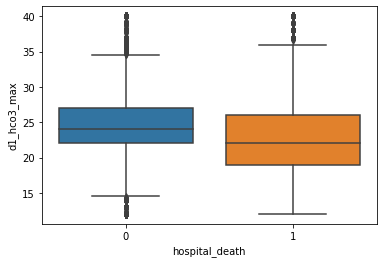

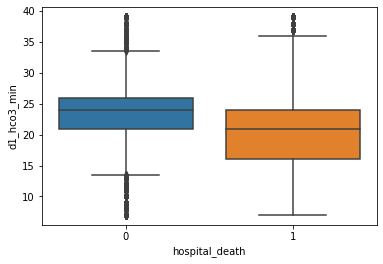

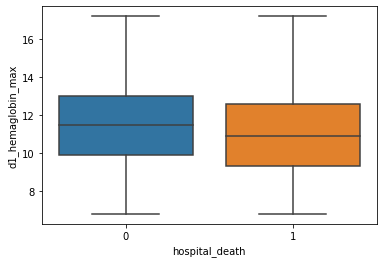

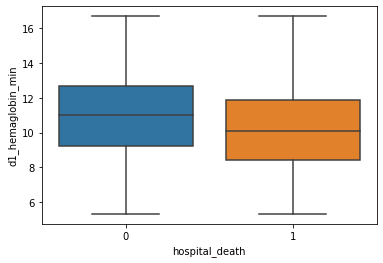

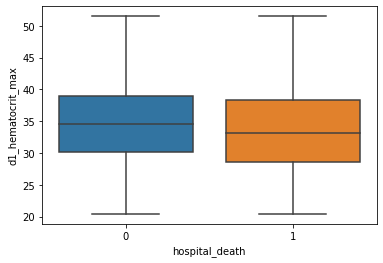

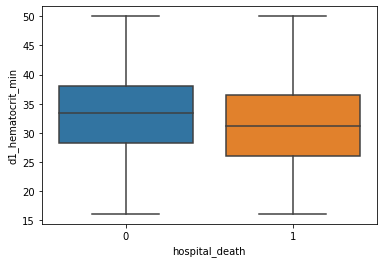

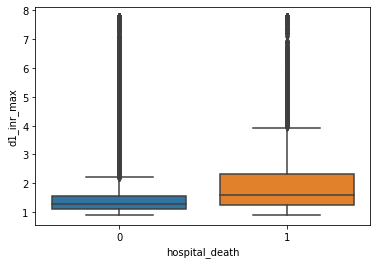

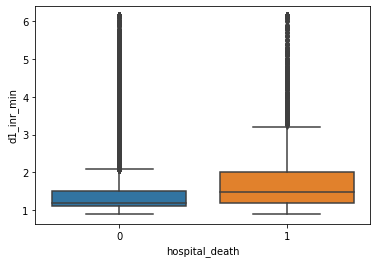

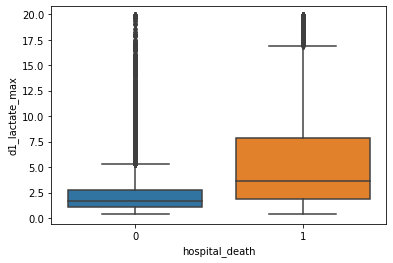

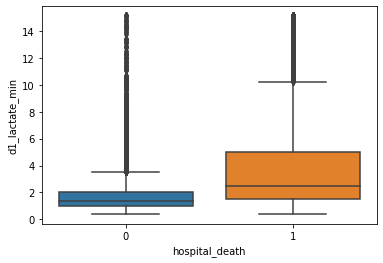

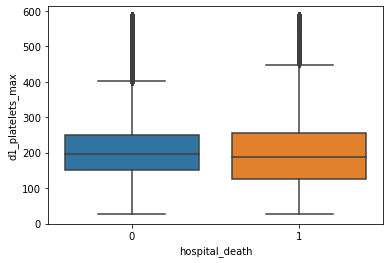

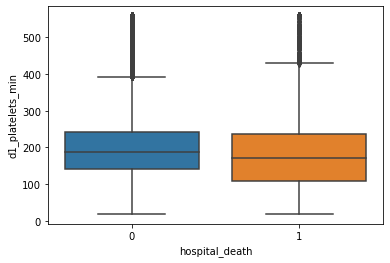

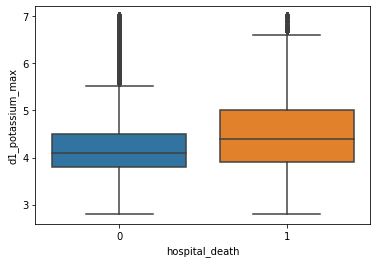

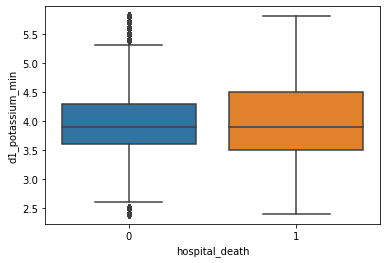

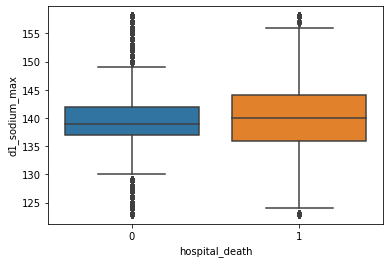

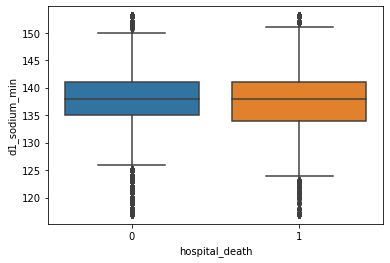

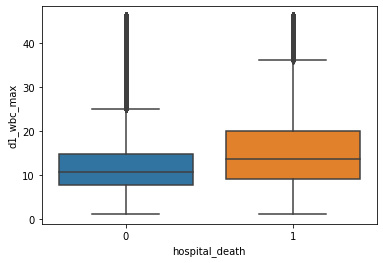

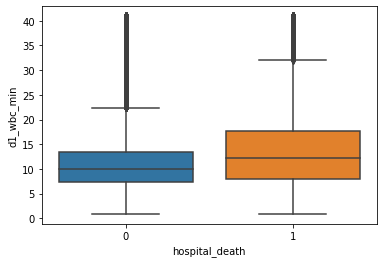

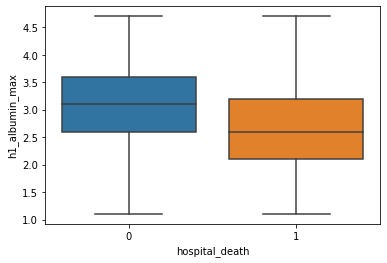

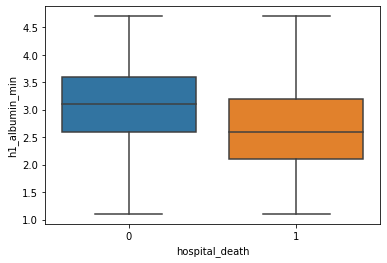

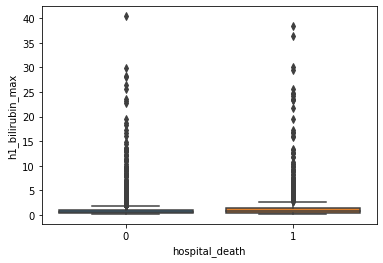

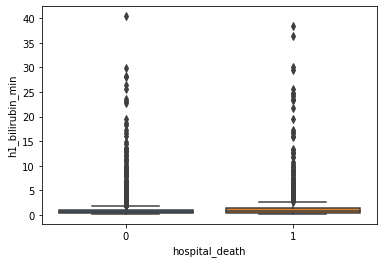

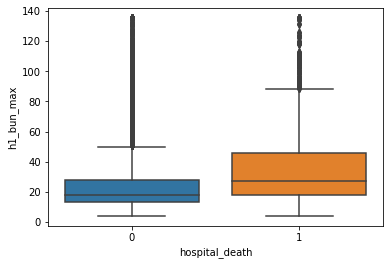

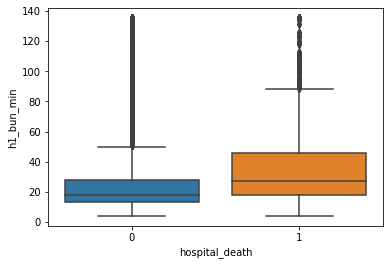

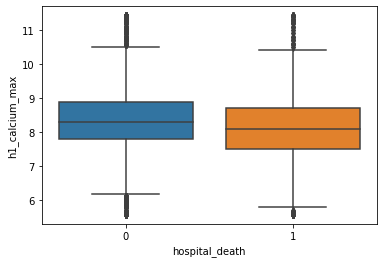

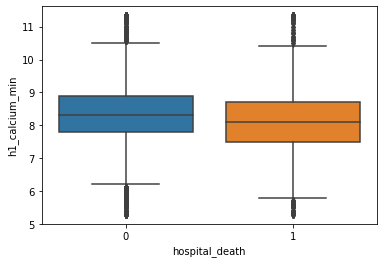

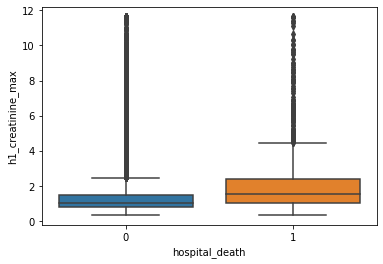

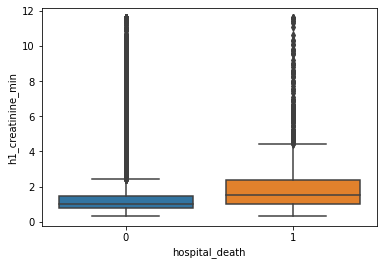

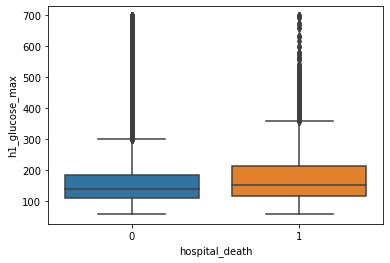

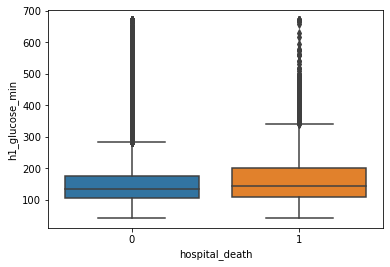

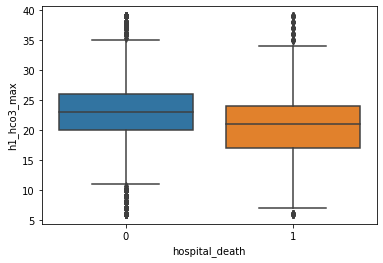

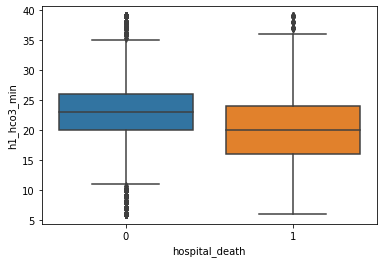

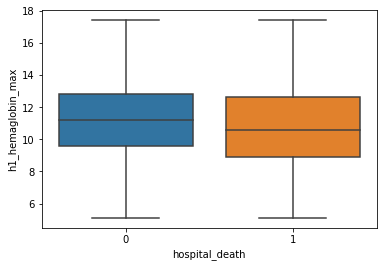

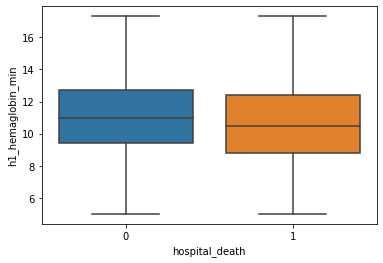

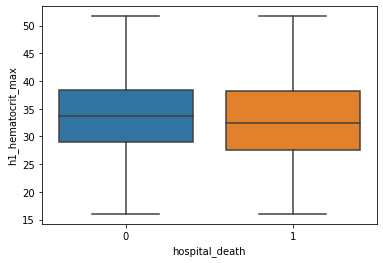

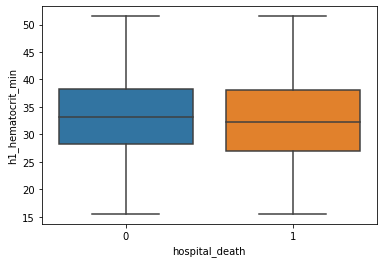

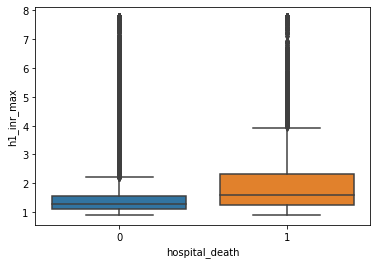

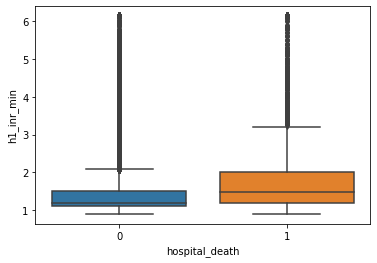

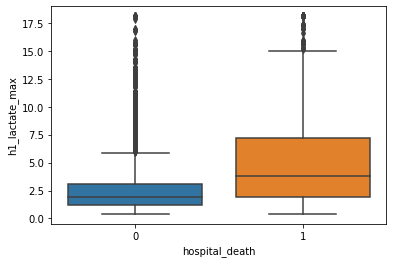

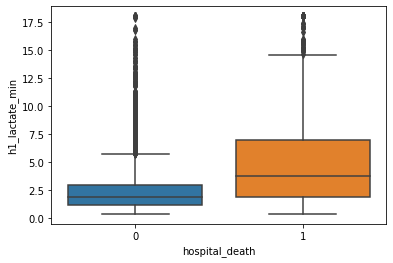

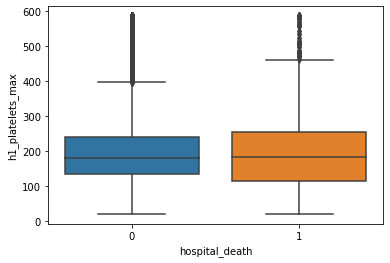

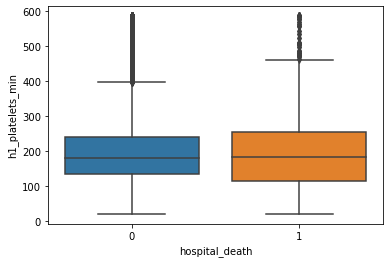

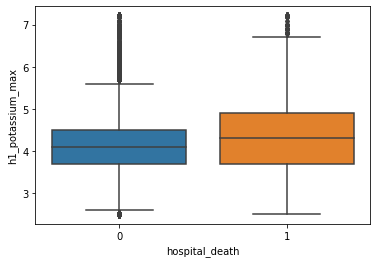

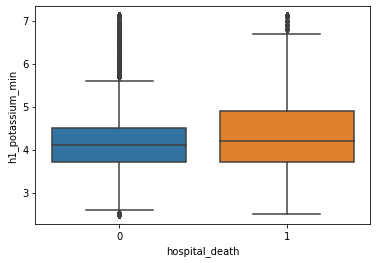

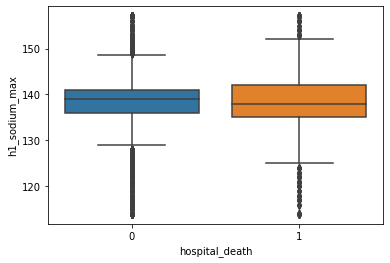

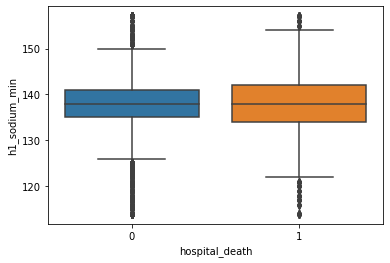

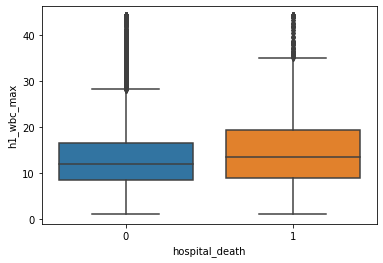

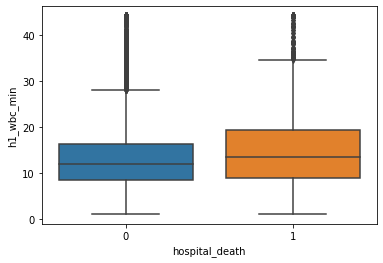

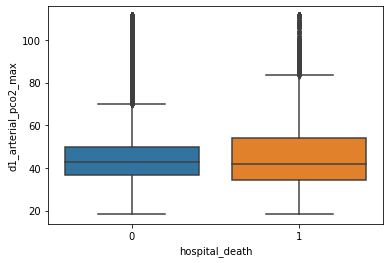

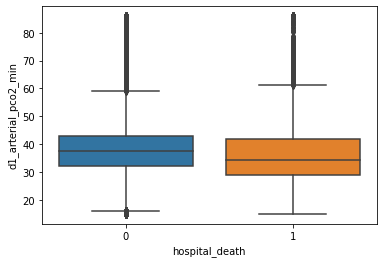

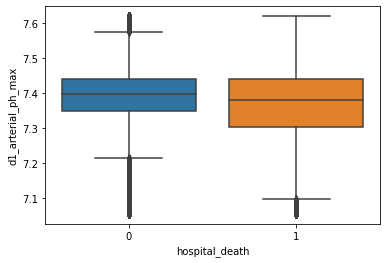

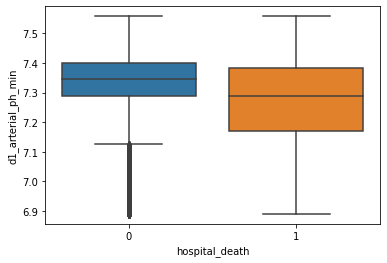

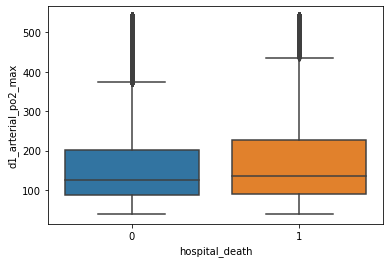

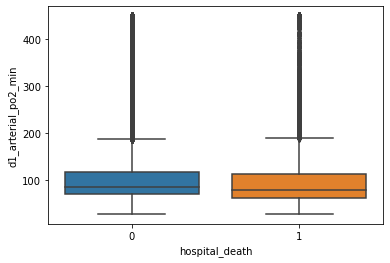

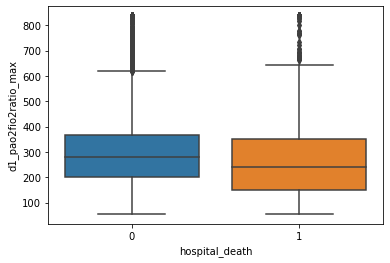

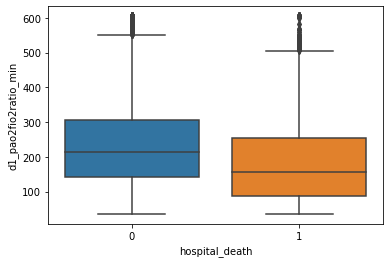

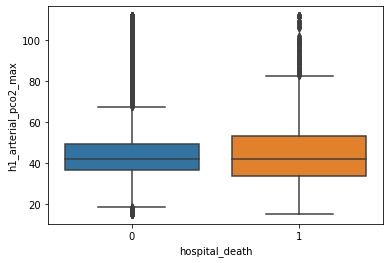

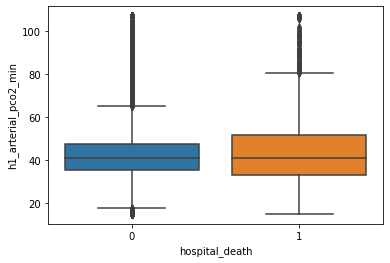

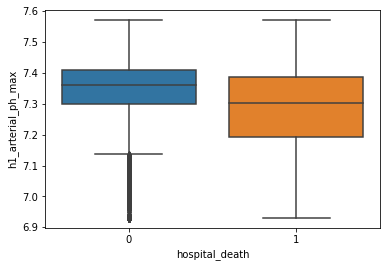

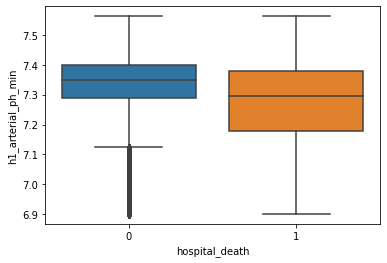

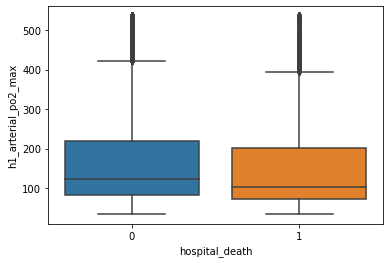

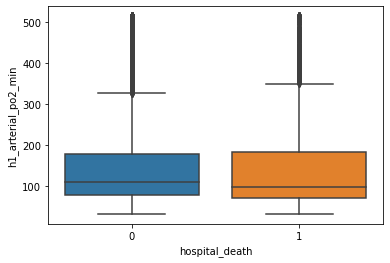

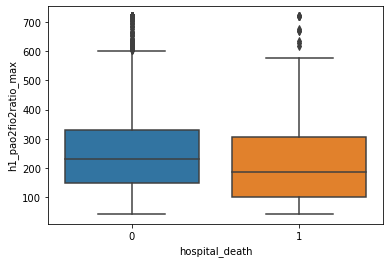

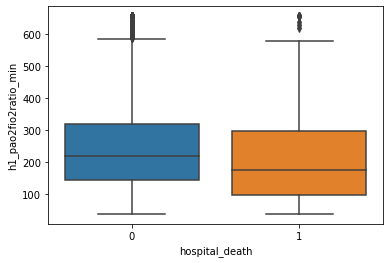

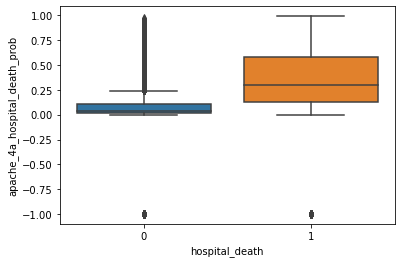

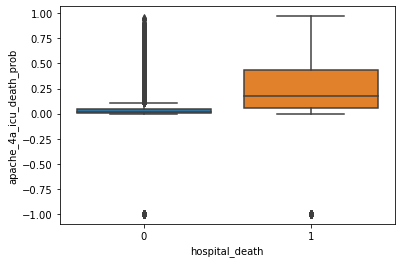

In [13]:
COLOFINTEREST = 'hospital_death'

for i,c in enumerate(numeric_cols):
    #print(df[[COLOFINTEREST,c]].groupby(COLOFINTEREST))
    plt.figure()
    sns.boxplot(x=COLOFINTEREST, y=c, data=df)


In [14]:
interesting_cols = ['gcs_verbal_apache' , 'gcs_motor_apache' , 'gcs_eyes_apache'  'bun_apache' 
                    , 'dl_diasbp_min' 
                    , 'dl_diasbp_noninvasive_min' , 'dl_heartrate_max' , 'dl_mbp_invasive_min'
                   , 'dl_mnp_min' , 'dl_mbp_noninvasive_min' , 'dl_sysbp_invasive_min'
                   ,'dl_sysbp_min']

In [15]:
gdf = df[numeric_cols + [COLOFINTEREST]].groupby(COLOFINTEREST).describe()

In [16]:
gdf

age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
hospital_death                                                                
0               80212.0  61.748741  16.860137  16.0  52.0  64.0  75.0  89.0   
1                7273.0  68.494156  14.428363  16.0  60.0  71.0  80.0  89.0   

                    bmi             ... apache_4a_hospital_death_prob        \
                  count       mean  ...                           75%   max   
hospital_death                      ...                                       
0               80732.0  29.264902  ...                          0.11  0.97   
1                7552.0  28.340398  ...                          0.58  0.99   

               apache_4a_icu_death_prob                                       \
                                  count      mean       std  min   25%   50%   
hospital_death                                                                 
0                               76403.0  0.024799  0.193417 -1.0  0.01  0.02   
1                                7363.0  0.242726  0.325432 -1.0  0.06  0.18   

                             
                  75%   max  
hospital_death               
0               0.050  0.95  
1               0.435  0.97  

[2 rows x 1272 columns]

In [17]:
interesting_cols = []
for col in gdf.columns.levels[0]:
    
    val25 = gdf.loc[:, [(col , "25%")]].T.values[0]
    val50 = gdf.loc[:, [(col , "50%")]].T.values[0]
    val75 = gdf.loc[:, [(col , "75%")]].T.values[0]
    vals = (val25,val50,val75)
    
    if (val50[1] < val25[0]) or (val50[1] > val75[0]):
        print(col)
        interesting_cols.append(col)




bun_apache
creatinine_apache
gcs_motor_apache
gcs_verbal_apache
d1_mbp_invasive_min
d1_mbp_min
d1_mbp_noninvasive_min
d1_sysbp_invasive_min
d1_sysbp_min
d1_sysbp_noninvasive_min
d1_bun_max
d1_bun_min
d1_creatinine_max
d1_creatinine_min
d1_inr_max
d1_lactate_max
d1_lactate_min
h1_creatinine_max
h1_creatinine_min
h1_inr_max
h1_lactate_max
h1_lactate_min
apache_4a_hospital_death_prob
apache_4a_icu_death_prob


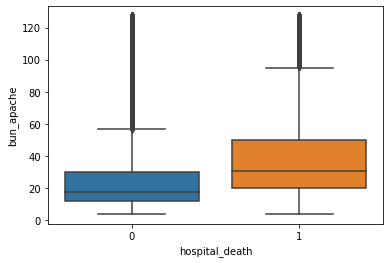

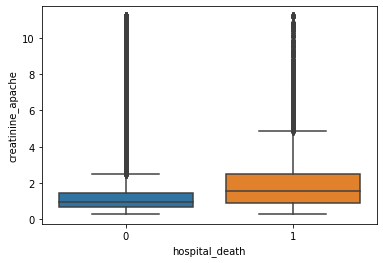

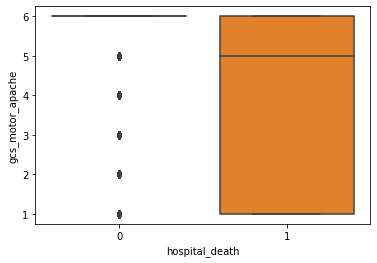

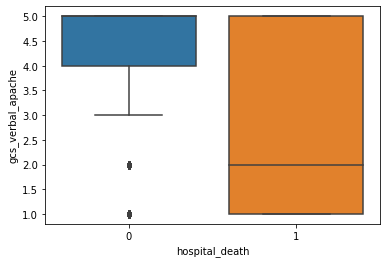

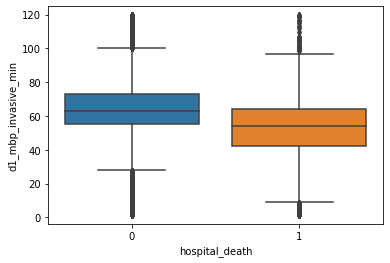

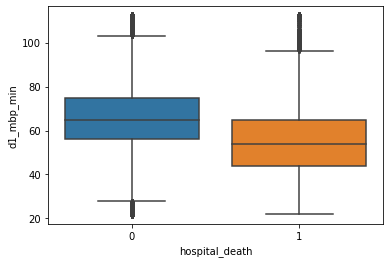

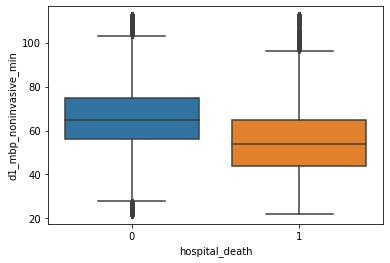

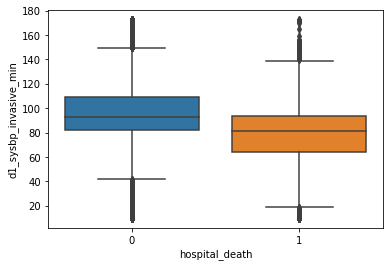

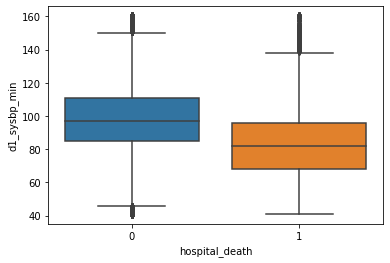

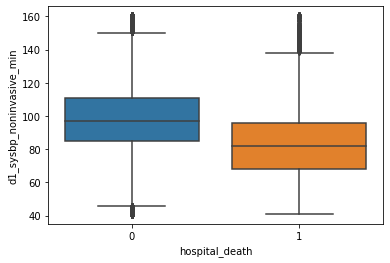

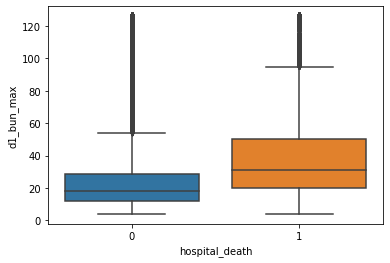

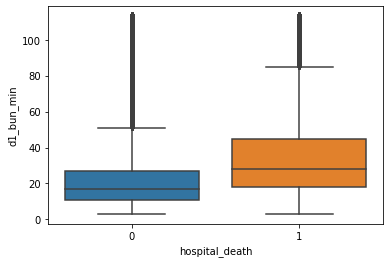

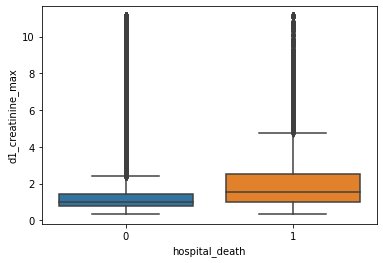

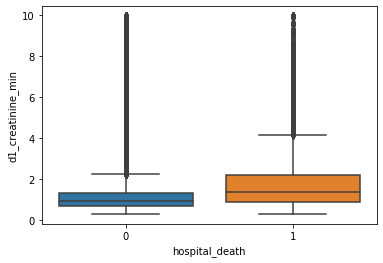

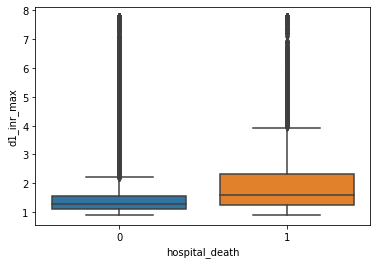

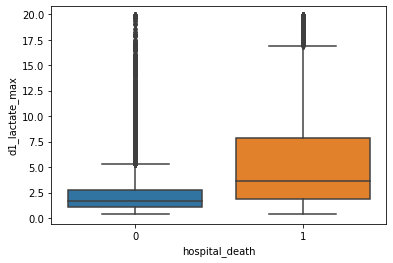

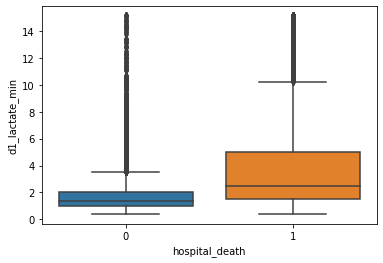

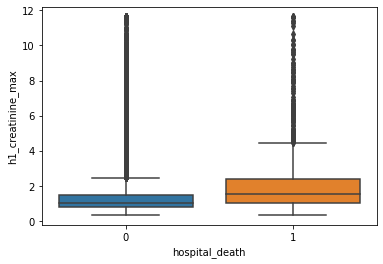

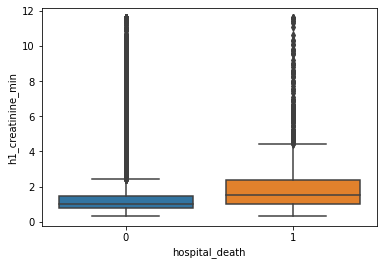

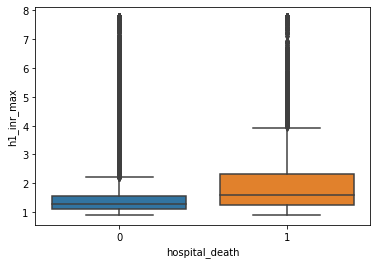

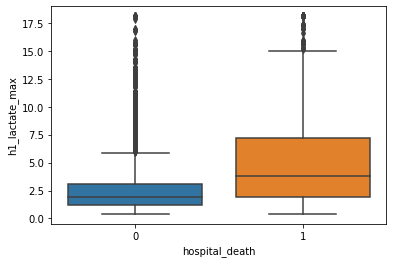

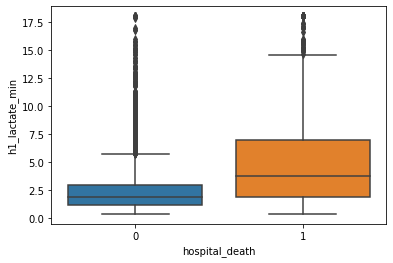

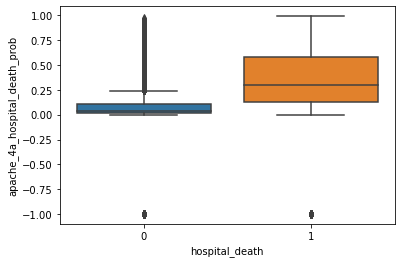

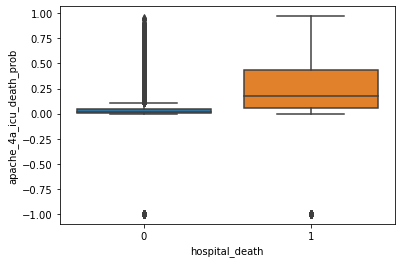

In [18]:


for c in interesting_cols:
    plt.figure()
    sns.boxplot(x=COLOFINTEREST, y=c, data=df)
    

In [19]:
df[["patient_id" , "encounter_id"]].groupby("patient_id").count()

,encounter_id
patient_id,
1,1
2,1
3,1
4,1
5,1
...,...
131045,1
131047,1
131048,1


In [20]:
print(list(df.columns))
 

['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

## Categorical Variables

In [41]:

for c in [c for c in df.columns if ptypes.is_categorical_dtype(df[c]) and c.find("_id") < 0 and c != COLOFINTEREST]:
    #print(pd.crosstab(df[c] , df[COLOFINTEREST] , margins =True, normalize ='index'))
    _ , pval , _ , _ =chi2_contingency(pd.crosstab(df[c] , df[COLOFINTEREST] )) 
    if pval < 0.05:
        interesting_cols.append(c)
        print(f"{c} , p-val {pval}")
        print("\n\n")

# from scipy import stats
# stats.chi2_contingency(pd.crosstab(df[c] , df[COLOFINTEREST] ))
# catcols =  [c for c in df.columns if ptypes.is_categorical_dtype(df[c]) and c.find("_id") < 0 and c != COLOFINTEREST]
# chi2(df[catcols] , df[COLOFINTEREST])

elective_surgery , p-val 1.8111023373323387e-176



gender , p-val 0.03441709366041668



apache_post_operative , p-val 1.6847425574384933e-141



arf_apache , p-val 2.358445321478141e-16



gcs_unable_apache , p-val 2.1892372973026164e-54



intubated_apache , p-val 0.0



ventilated_apache , p-val 0.0



cirrhosis , p-val 2.0589866794437976e-32



diabetes_mellitus , p-val 2.061134966044744e-06



hepatic_failure , p-val 1.7857663059955913e-31



immunosuppression , p-val 6.051929777307242e-40



leukemia , p-val 4.865495171455472e-19



lymphoma , p-val 2.7690885536386856e-08



solid_tumor_with_metastasis , p-val 2.4229313146985304e-53





In [43]:
print(f"final interesting columns {interesting_cols} : num = {len(interesting_cols)}")

final interesting columns ['bun_apache', 'creatinine_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'd1_mbp_invasive_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_sysbp_invasive_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_inr_max', 'd1_lactate_max', 'd1_lactate_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_inr_max', 'h1_lactate_max', 'h1_lactate_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'elective_surgery', 'gender', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis'] : num = 38
